In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:

# Define number of symbols and real number a
K = 10000
a = 2

# Generate BPSK constellation points
x = np.random.choice([-a, a], size=(K, 1))

# Simulate fading channel with complex Gaussian noise
h = np.random.normal(0, np.sqrt(0.5), (K,1)) + 1j * np.random.normal(0, np.sqrt(0.5), (K,1)) # CN(0,1)

# Add noise to received symbol
w = np.random.normal(0, np.sqrt(0.05), (K,1)) + 1j * np.random.normal(0, np.sqrt(0.05), (K,1)) # CN(0,0.1)
y = h*x + w


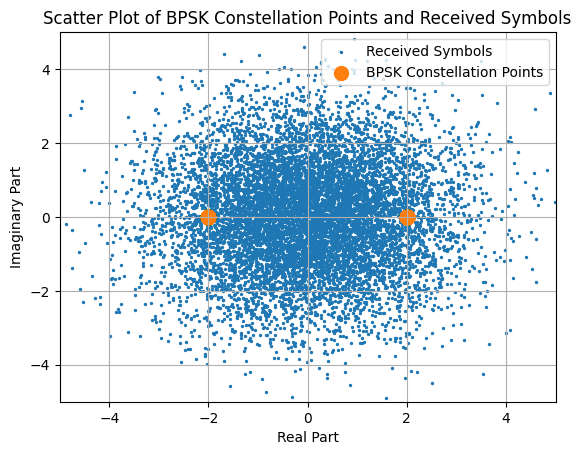

In [5]:
# Scatter plot

plt.scatter(y.real, y.imag, s=2, alpha=1, label="Received Symbols")
plt.scatter(x.real, x.imag, s=100, label="BPSK Constellation Points")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.legend()
plt.grid(True)
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.title("Scatter Plot of BPSK Constellation Points and Received Symbols")
plt.show()

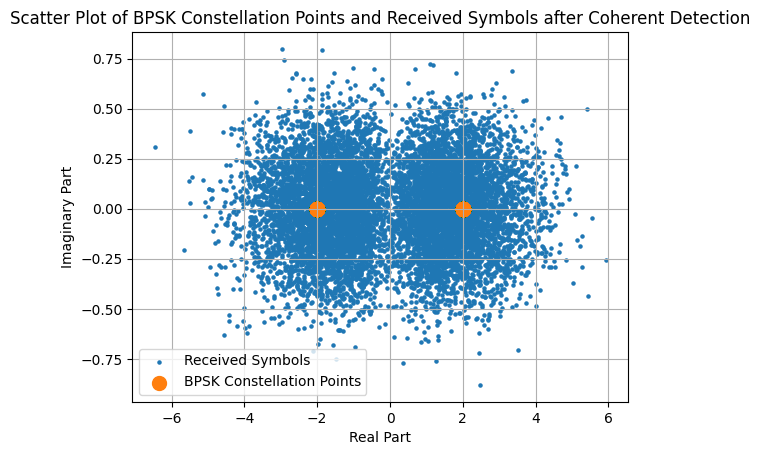

In [6]:

yh = np.conj(h)*y/(np.abs(h))

plt.scatter(yh.real, yh.imag, s=5, alpha=1, label="Received Symbols")
plt.scatter(x.real, x.imag, s=100, label="BPSK Constellation Points")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.legend()
plt.grid(True)
plt.title("Scatter Plot of BPSK Constellation Points and Received Symbols after Coherent Detection")
plt.show()


In [7]:
detected_symbols = np.zeros_like(yh)
# Loop through each element in yh to detect the symbols
for i in range(len(yh)):
    if np.real(yh[i]) > 0:
        detected_symbols[i] = a
    else:
        detected_symbols[i] = -a

# Print the detected symbols
print(detected_symbols)

[[-2.+0.j]
 [-2.+0.j]
 [-2.+0.j]
 ...
 [-2.+0.j]
 [ 2.+0.j]
 [ 2.+0.j]]


In [ ]:
Pe = np.sum(x != detected_symbols)/len(x)
print(Pe)

0.0057
